In [1]:
# Standard code libraries
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Custom code libraries from the ReSurfEMG
import resurfemg.preprocessing.envelope as evl

%matplotlib widget

In [2]:
# Define signal
fs_emg = 2048
t_emg = np.array([s_t/fs_emg for s_t in range(3*fs_emg)])
x_sin = np.sin(t_emg * 2 * np.pi)
x_sin[x_sin < 0] = 0
x_rand = np.random.normal(0, 1, size=len(x_sin))
x_t = x_sin * x_rand

In [3]:
def full_rolling_rms_original(data_emg, window_length):
    """This function computes a root mean squared envelope over an
    array :code:`data_emg`.  To do this it uses number of sample values
    :code:`window_length`. It differs from :func:`naive_rolling_rms`
    by that the     output is the same length as the input vector.

    :param data_emg: Samples from the EMG
    :type data_emg: ~numpy.ndarray
    :param window_length: Length of the sample use as window for function
    :type window_length: int

    :returns: The root-mean-squared EMG sample data
    :rtype: ~numpy.ndarray
    """
    x_pad = np.pad(
        data_emg,
        (0, window_length-1),
        'constant',
        constant_values=(0, 0)
    )

    x_2 = np.power(x_pad, 2)
    window = np.ones(window_length)/float(window_length)
    emg_rms = np.sqrt(np.convolve(x_2, window, 'valid'))
    return emg_rms

In [4]:
# def full_rolling_rms_new(data_emg, window_length):
#     """This function computes a root mean squared envelope over an
#     array :code:`data_emg`.  To do this it uses number of sample values
#     :code:`window_length`. It differs from :func:`naive_rolling_rms`
#     by that the     output is the same length as the input vector.

#     :param data_emg: Samples from the EMG
#     :type data_emg: ~numpy.ndarray
#     :param window_length: Length of the sample use as window for function
#     :type window_length: int

#     :returns: The root-mean-squared EMG sample data
#     :rtype: ~numpy.ndarray
#     """
#     padded_samples = int(np.floor(window_length/2))
#     window = np.ones(window_length)/float(window_length)
#     emg_rms_padded = np.sqrt(np.convolve(np.power(data_emg, 2), window, 'full'))
#     emg_rms = emg_rms_padded[padded_samples:-padded_samples]

#     return emg_rms

In [7]:
# Get RMS signal
window_s = fs_emg // 5  # 200 ms --> Delay of 100 ms
x_rms_original = full_rolling_rms_original(x_t, window_s)
x_rms_new = evl.full_rolling_rms(x_t, window_s)

# Find peaks in source, original RMS signal, and new RMS signal
peak_idxs_source, _ = find_peaks(x_sin, prominence=0.1)
peaks_original, _ = find_peaks(x_rms_original, prominence=0.1)
peaks_new, _ = find_peaks(x_rms_new, prominence=0.1)

# Check whether any peak errors are > 0.05 s
peak_errors = np.abs((t_emg[peaks_new] - t_emg[peak_idxs_source]))
np.any(peak_errors > 0.05)

False

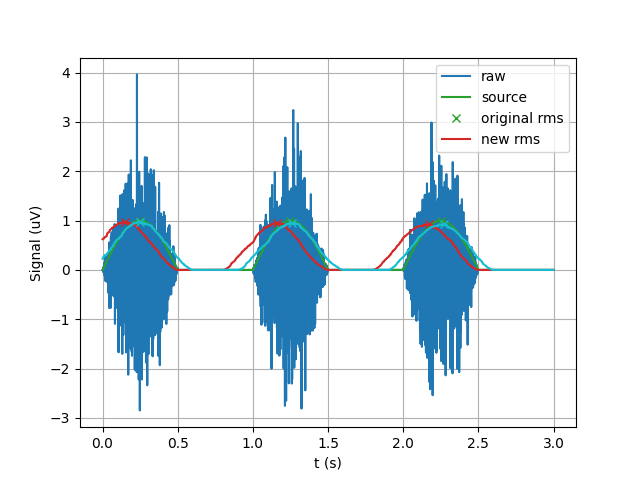

In [9]:
# Plot the raw data
fig, axis = plt.subplots(nrows=1, ncols=1)
axis.grid
axis.grid(True)
axis.plot(t_emg, x_t, color='tab:blue')
axis.plot(t_emg, x_sin, color='tab:green')
axis.plot(t_emg[peak_idxs_source], x_sin[peak_idxs_source], 'x', color='tab:green')
axis.plot(t_emg, x_rms_original, color='tab:red')
axis.plot(t_emg[peaks_original], x_rms_original[peaks_original],
          'x', color='tab:red')
axis.plot(t_emg, x_rms_new, color='tab:cyan')
axis.plot(t_emg[peaks_new], x_rms_new[peaks_new],
          'x', color='tab:cyan')
axis.set_xlabel('t (s)')
axis.set_ylabel('Signal (uV)')
axis.legend(['raw', 'source', 'original rms', 'new rms'])